# Compute connected components of 3D image

This notebook uses the `skimage` library's `measure.label()` function to compute connected components in a 3D worm image.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from skimage import measure
from skimage import filters

### Load single video frame from file

In [3]:
# Path to HDF5 file
in_fpath = '/home/mn2822/Desktop/WormTracking/data/zimmer/mCherry_v00065-01581.hdf5'

# Index of frame to use
t_frame = 500

with h5py.File(in_fpath, 'r') as f:
    dset = f.get('mCherry')
    frame = dset[t_frame, 0, :, :, :]
    frame = np.moveaxis(frame, [0, 1, 2], [2, 1, 0])

### Select head region from frame as test image 

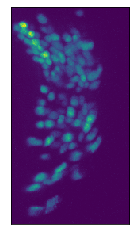

In [8]:
# Section of XY plane where head is found
head_x = (500, 650)
head_y = (250, 525)
head_z = (0, 33)

img = frame[head_x[0]:head_x[1], head_y[0]:head_y[1], head_z[0]:head_z[1]]

# Display max projection
plt.imshow(np.max(img, 2).T);
plt.xticks([])
plt.yticks([]);

### Binarize image using threshold

Right now, this threshold is set by hand.

**TODO: Find a way to automatically set this (maybe using Oatsu's algorithm?)**

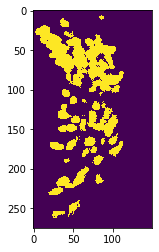

In [32]:
# Threshold applied to pixel values in image
threshold = 300

# Create binary th
img_th = (img >= threshold).astype('uint16')

# Display max projection
plt.imshow(np.max(img_th, 2).T);

### Compute connected components in image

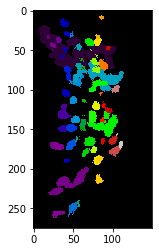

In [34]:
img_labels = measure.label(img_th)
plt.imshow(np.max(img_labels, 2).T, cmap='nipy_spectral');

### Display results

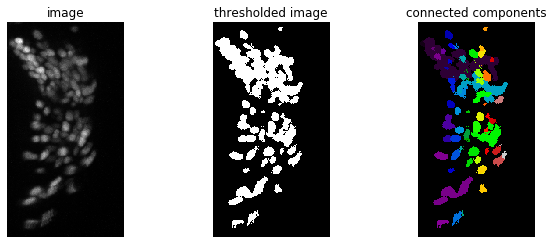

In [36]:
img_mp = np.max(img, 2)
img_th_mp = np.max(img_th, 2)
img_labels_mp = np.max(img_labels, 2)

plt.figure(figsize=(9, 3.5))

plt.subplot(131)
plt.imshow(img_mp.T, cmap='gray')
plt.axis('off')
plt.title('image')

plt.subplot(132)
plt.imshow(img_th_mp.T, cmap='gray')
plt.axis('off')
plt.title('thresholded image')

plt.subplot(133)
plt.imshow(img_labels_mp.T, cmap='nipy_spectral')
plt.axis('off')
plt.title('connected components')

plt.tight_layout()

plt.savefig('components_mp.png')